<a href="https://colab.research.google.com/github/GustavoUNAL/D-A_Converter/blob/main/RNNA_TAPDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy tensorflow keras


In [ ]:
import numpy as np

# Cargar los datos con allow_pickle=True
data_input = np.load('/content/drive/MyDrive/TPDS/data_input.npy', allow_pickle=True)
data_labels = np.load('/content/drive/MyDrive/TPDS/data_labels.npy', allow_pickle=True)


In [ ]:
print(data_input.shape)
print(data_labels.shape)

(15, 499, 19)
(15, 3)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Asumiendo que data_input es un array de NumPy
data_input_reshaped = data_input.reshape(-1, data_input.shape[-1])

# Función para convertir strings a float
def convert_to_float(x):
    if isinstance(x, str):
        # Reemplaza comas con puntos si es necesario
        x = x.replace(',', '.')
        # Remueve puntos como separadores de miles, si no están en un contexto decimal
        if x.count('.') > 1:
            x = x.replace('.', '', x.count('.') - 1)
        return float(x)
    return x

# Convertir las cadenas a números flotantes
data_input_reshaped = np.array([convert_to_float(x) for x in data_input_reshaped.flatten()]).reshape(data_input_reshaped.shape)

# Crear y aplicar el StandardScaler
scaler = StandardScaler()
data_input_reshaped = scaler.fit_transform(data_input_reshaped)
data_input = data_input_reshaped.reshape(data_input.shape)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos
train_input, test_input, train_labels, test_labels = train_test_split(data_input, data_labels, test_size=0.1, random_state=42)


Construcción de la Red Neuronal

In [ ]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Número de características de entrada
n_features = data_input.shape[2]

# Definir el modelo
model = Sequential([
    LSTM(50, input_shape=(data_input.shape[1], n_features), return_sequences=True),
    #### ---
    #data_input.shape[1]: Número de pasos de tiempo (timesteps)
    #n_features: Número de características por paso de tiempo
    #return_sequences=True: Devuelve la secuencia completa (salida para cada paso de tiempo)
    ### ---
    Dropout(0.2),  # Regularización para reducir el sobreajuste. El 20% de las unidades se descartan durante el entrenamiento.
    LSTM(50), #Devuelve solo la última salida en la secuencia.
    Dropout(0.2),  # Regularización para reducir el sobreajuste
    Dense(32, activation='relu'),  # Capa densa adicional totalmente conectada con 30 neuronas y Función de activación ReLU para introducir no linealidad.
    Dropout(0.2),  #Regularización para reducir el sobreajuste
    Dense(3, activation='softmax') # Número de clases de salida ( run, wal, sit) Función de activación Softmax para obtener probabilidades para cada clase.
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenar el modelo

history = model.fit(data_input, data_labels, epochs=30, batch_size=32, validation_split=0.2)



Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 1.1025 - accuracy: 0.3333 - val_loss: 1.1076 - val_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 0s 419ms/step - loss: 1.0292 - accuracy: 0.6667 - val_loss: 1.0983 - val_accuracy: 0.3333
Epoch 3/30
1/1 [==============================] - 0s 427ms/step - loss: 0.9667 - accuracy: 0.7500 - val_loss: 1.0893 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 0s 422ms/step - loss: 0.9116 - accuracy: 0.8333 - val_loss: 1.0817 - val_accuracy: 0.3333
Epoch 5/30
1/1 [==============================] - 0s 436ms/step - loss: 0.9547 - accuracy: 0.7500 - val_loss: 1.0708 - val_accuracy: 0.6667
Epoch 6/30
1/1 [==============================] - 0s 411ms/step - loss: 0.8330 - accuracy: 0.9167 - val_loss: 1.0606 - val_accuracy: 0.6667
Epoch 7/30
1/1 [==============================] - 0s 435ms/step - loss: 0.8491 - accuracy: 0.9167 - val_loss: 1.0497 - val_accuracy: 0.6667
Epoch 8/30
1/1 [=======

## Desempeño de la red neuronal

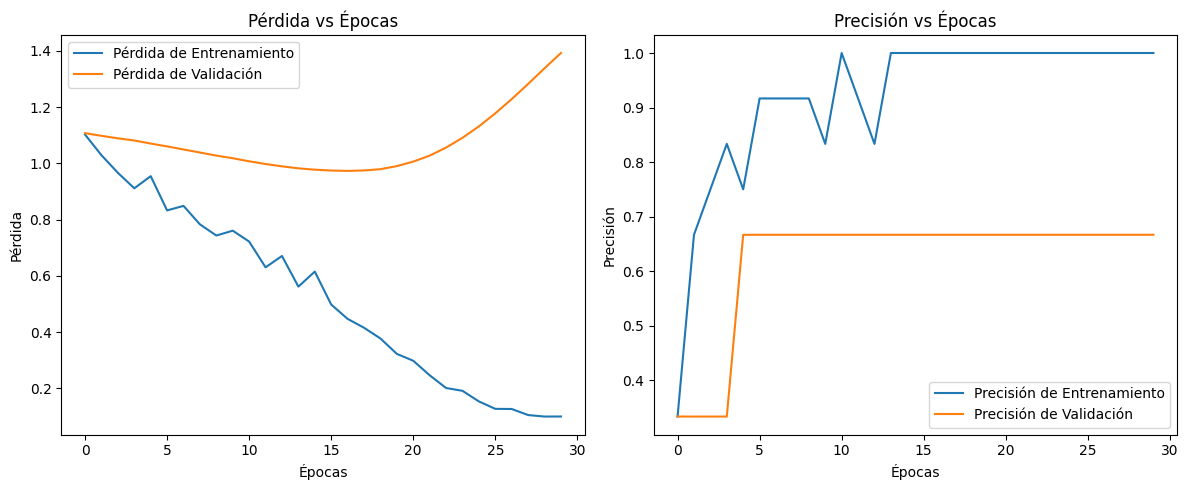

In [ ]:

# Graficar la pérdida (loss) y precisión (accuracy)
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Pérdida
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title('Pérdida vs Épocas')

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.title('Precisión vs Épocas')

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)

## Test Accuracy

In [ ]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_input, test_labels)
print('Test accuracy:', test_acc)


1/1 [==============================] - 0s 93ms/step - loss: 0.0440 - accuracy: 1.0000
Test accuracy: 1.0


Esto significa que el modelo predijo correctamente el 100% de las etiquetas en el conjunto de prueba.

y que el modelo alcanzó una precisión de aproximadamente 100% en el conjunto de prueba.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_input, test_labels)
print(f'Pérdida en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')


1/1 [==============================] - 0s 77ms/step - loss: 0.0440 - accuracy: 1.0000
Pérdida en el conjunto de prueba: 0.04402165859937668
Precisión en el conjunto de prueba: 1.0


## Obetener las predicciones

In [ ]:
# Obtener las predicciones
test_pred = model.predict(test_input)
test_pred_labels = np.argmax(test_pred, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)


1/1 [==============================] - 1s 978ms/step


## recall_score

In [ ]:
from sklearn.metrics import recall_score

# Calcular la sensibilidad
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
print(f'Recall (Sensibilidad): {recall}')


Recall (Sensibilidad): 1.0



La métrica Recall (Sensibilidad), también conocida como recall o true positive rate (tasa de verdaderos positivos), mide la capacidad del modelo para identificar correctamente los casos positivos. En otras palabras, indica el porcentaje de muestras positivas que el modelo ha clasificado correctamente como positivas.

Esto significa que el modelo está identificando correctamente el 100% de las muestras positivas.

## F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Calcular el F1-Score
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')
print(f'F1-Score: {f1}')



F1-Score: 1.0


El F1-Score es una métrica que combina la precisión y el recall (sensibilidad) en una sola puntuación para proporcionar una medida más equilibrada del rendimiento del modelo.

Un valor de 1 implica que el modelo tiene un rendimiento excelene.

## Curva ROC

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


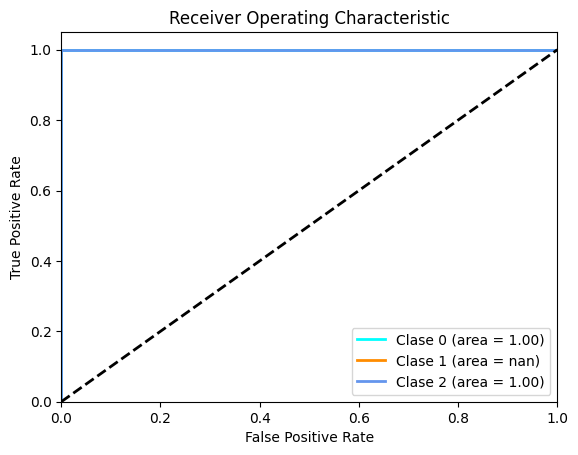

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Binarizar las etiquetas si es necesario
from sklearn.preprocessing import label_binarize
n_classes = 3  # Número de clases
test_true_labels_binarized = label_binarize(test_true_labels, classes=[0, 1, 2])

# Calcular las probabilidades para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_true_labels_binarized[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotear la curva ROC
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Clase {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


La grafica indica que par ala clase 0 y 2 los AUC de 1 tiene una precisiónm perfecta al distinguir estas clases

# Uso de la RNNA

In [ ]:
# Se propone usar la primera muestra del conjunto de prueba
sample_to_predict = test_input[0:1]

In [ ]:
# Hacer la predicción
prediction = model.predict(sample_to_predict)
print("Probabilidades de cada clase:", prediction)


1/1 [==============================] - 0s 353ms/step
Probabilidades de cada clase: [[0.9598026  0.02654028 0.01365703]]


In [ ]:
# Determinar la clase predicha
predicted_class = np.argmax(prediction, axis=1)
class_labels = ['run', 'walk', 'sit']
predicted_state = class_labels[predicted_class[0]]

print("El estado predicho es:", predicted_state)


El estado predicho es: run


# Predecir con un dato externo al entrenamiento

In [ ]:
import numpy as np

# Cargar el tensor
data_tensor = np.load('/content/drive/MyDrive/TPDS/data_single_tensor_s13.npy', allow_pickle=True)

# Imprimir las primeras filas para inspección
print(data_tensor[:5])


[[29685 0 81354 78060 3748 86039 95755 5862 6965507 5303105 33.56 35.63
  '34.448.349' '9.372.581' '-3.423.883' '1.901.093' '-0.905586' -0.494907
  '0.86616']
 [30601 0 81354 78060 3748 86039 95755 5862 6965507 5303105 33.56 35.63
  '34.448.349' '9.372.581' '-3.423.883' '1.901.093' '-0.905586' -0.494907
  '0.86616']
 [31427 0 81365 78048 3750 86053 95755 5864 6965507 5303105 33.56 35.63
  '3.444.236' '9.373.777' '-340.413' '1.896.903' '-0.914774' -0.492377
  '0.865627']
 [32186 0 81361 78056 3753 86055 95744 5861 6965507 5303105 33.56 35.63
  '34.439.362' '9.358.812' '-3.380.785' '1.875.953' '-0.923429' -0.489314
  '0.864295']
 [32762 0 81358 78052 3757 86062 95754 5865 6965507 5303105 33.5 35.63
  '34.436.367' '934.744' '-334.068' '1.836.446' '-0.941006' -0.485186
  '0.859369']]


In [ ]:
# Función para limpiar y convertir a flotante
def clean_convert(x):
    if isinstance(x, str):  # Si el elemento es una cadena
        try:
            return float(x.replace('.', '').replace(',', '.'))
        except ValueError:
            return np.nan  # Convertir a NaN si no es posible la conversión
    return x

# Aplicar la función a cada elemento en el tensor
cleaned_tensor = np.vectorize(clean_convert)(data_tensor)

# Verificar si hay NaNs y decidir qué hacer con ellos
if np.isnan(cleaned_tensor).any():
    print("Hay NaNs en el tensor.")
    # Opción 1: Rellenar NaNs, por ejemplo con la media de la columna
    # O rellenar con ceros o eliminar las filas/columnas con NaNs
    mean_values = np.nanmean(cleaned_tensor, axis=0)  # Calcular la media ignorando NaNs
    indices = np.where(np.isnan(cleaned_tensor))  # Encontrar índices de NaNs
    cleaned_tensor[indices] = np.take(mean_values, indices[1])  # Rellenar NaNs con la media

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Asumiendo que el tensor está en la forma correcta para la normalización
data_tensor_normalized = scaler.fit_transform(cleaned_tensor)

# Verificar la forma y el tipo de los datos normalizados
print(data_tensor_normalized.shape)
print(data_tensor_normalized.dtype)

# la forma correcta deba ser (1, 499, 19) y data_tensor_normalized tiene forma (499, 19)
if len(data_tensor_normalized.shape) == 2:
    data_tensor_normalized = np.expand_dims(data_tensor_normalized, axis=0)

print("Nueva forma del tensor de entrada:", data_tensor_normalized.shape)




(499, 19)
float64
Nueva forma del tensor de entrada: (1, 499, 19)


In [ ]:
# Suponiendo que 'model' es tu modelo cargado
prediction = model.predict(data_tensor_normalized)
print("Probabilidades de cada clase:", prediction)

# Interpretar la predicción
predicted_class = np.argmax(prediction, axis=1)
class_labels = ['run', 'walk', 'sit']
predicted_state = class_labels[predicted_class[0]]

print("El estado predicho es:", predicted_state)


1/1 [==============================] - 0s 61ms/step
Probabilidades de cada clase: [[0.29333737 0.6162277  0.09043489]]
El estado predicho es: walk


# otra perdicción.

In [ ]:
import numpy as np

# Cargar el tensor
data_tensor2 = np.load('/content/drive/MyDrive/TPDS/data_single_tensor_s20.npy', allow_pickle=True)

# Imprimir las primeras filas para inspección
print(data_tensor2[:5])

# Función para limpiar y convertir a flotante
def clean_convert(x):
    if isinstance(x, str):  # Si el elemento es una cadena
        try:
            return float(x.replace('.', '').replace(',', '.'))
        except ValueError:
            return np.nan  # Convertir a NaN si no es posible la conversión
    return x

# Aplicar la función a cada elemento en el tensor
cleaned_tensor2 = np.vectorize(clean_convert)(data_tensor2)

# Verificar si hay NaNs y decidir qué hacer con ellos
if np.isnan(cleaned_tensor2).any():
    print("Hay NaNs en el tensor.")
    # Opción 1: Rellenar NaNs, por ejemplo con la media de la columna
    # O rellenar con ceros o eliminar las filas/columnas con NaNs
    mean_values = np.nanmean(cleaned_tensor2, axis=0)  # Calcular la media ignorando NaNs
    indices = np.where(np.isnan(cleaned_tensor2))  # Encontrar índices de NaNs
    cleaned_tensor2[indices] = np.take(mean_values, indices[1])  # Rellenar NaNs con la media

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Asumiendo que el tensor está en la forma correcta para la normalización
data_tensor_normalized2 = scaler.fit_transform(cleaned_tensor2)

# Verificar la forma y el tipo de los datos normalizados
print(data_tensor_normalized2.shape)
print(data_tensor_normalized2.dtype)

# la forma correcta deba ser (1, 499, 19) y data_tensor_normalized2 tiene forma (499, 19)
if len(data_tensor_normalized2.shape) == 2:
    data_tensor_normalized2 = np.expand_dims(data_tensor_normalized2, axis=0)

print("Nueva forma del tensor de entrada:", data_tensor_normalized2.shape)

# Suponiendo que 'model' es tu modelo cargado
prediction2 = model.predict(data_tensor_normalized2)
print("Probabilidades de cada clase:", prediction2)

# Interpretar la predicción
predicted_class = np.argmax(prediction2, axis=1)
class_labels = ['run', 'walk', 'sit']
predicted_state = class_labels[predicted_class[0]]

print("El estado predicho es:", predicted_state)


[[30178 0 78331 79452 4284 85981 92914 5710 5955591 6117513 33.94 35.63
  '34.127.865' 0.89428 -0.74224 '-9.415.079' 0.000563 '-0.006127'
  -0.001353]
 [30181 0 78340 79475 4272 85980 92906 5713 5955591 6117513 33.94 35.44
  '3.412.487' 0.903259 -0.747628 '-9.425.255' -0.000635 '-0.005061'
  -0.001752]
 [30219 0 78336 79487 4269 85969 92918 5715 5959371 6117513 33.94 35.44
  '34.127.865' 0.909244 -0.748825 '-9.438.424' -0.0017 '-0.004129'
  -0.001752]
 [30223 0 78348 79475 4281 85969 92918 5715 5959371 6117513 33.94 35.44
  '3.412.487' 0.911639 -0.745832 '-9.435.431' -0.003565 '-0.002531'
  -0.001752]
 [30244 0 78344 79491 4268 85974 92919 5717 5959371 6117513 33.94 35.44
  '34.115.883' 0.913435 -0.735656 '-9.431.241' -0.006095 '-0.0008'
  -0.001886]]
(499, 19)
float64
Nueva forma del tensor de entrada: (1, 499, 19)
1/1 [==============================] - 0s 51ms/step
Probabilidades de cada clase: [[0.13881706 0.08650023 0.77468276]]
El estado predicho es: sit


# Analisis del ejercicio:

Se escogio una Red neuronal recurrente (RNN) con unidades LSTM (Long Short-Term Memory). Este tipo de red se utiliza  para tareas relacionadas con datos secuenciales y temporales, como el análisis de series temporales, el procesamiento de lenguaje natural, y la clasificación de actividades basada en datos de sensores.

Dado que los datos de análisis son series temporales de señales de sensores (ECG, pleth_3, a_y, ++), las LSTM son ideales porque pueden analizar la secuencia de datos en el tiempo y detectar patrones importantes para la clasificación.

## Estructura de la Red Propuesta
La red incluye las siguientes capas y configuraciones:

Capas LSTM:  Dos capas LSTM consecutivas. La primera capa LSTM tiene return_sequences=True, lo que significa que devuelve una secuencia completa a la siguiente capa, permitiendo que la información temporal se preserve a lo largo de la red. La segunda capa LSTM devuelve solo el último output, condensando así la información de toda la secuencia en un solo vector.

Capa Densa: Después de las capas LSTM, se incluye una capa densa con una activación 'softmax'. Esta capa transforma el vector final de la LSTM en probabilidades de pertenencia a cada una de las clases (run, walk, sit). La función 'softmax' es ideal para clasificación multiclase porque normaliza las salidas en un vector de probabilidades.


La red neuronal que hemos discutido para tu proyecto es una Red Neuronal Recurrente (RNN) con unidades LSTM (Long Short-Term Memory). Este tipo de red se utiliza comúnmente para tareas relacionadas con datos secuenciales y temporales, como el análisis de series temporales, el procesamiento de lenguaje natural, y la clasificación de actividades basada en datos de sensores. A continuación, te explico las características principales de esta red y por qué se eligió para tu tarea:

Características de las Redes LSTM
Memoria a Largo Plazo: Las LSTM son una mejora de las RNN tradicionales porque son capaces de aprender dependencias a largo plazo en los datos. Esto se logra gracias a su estructura interna, que incluye puertas que regulan el flujo de información, permitiéndoles recordar información durante períodos prolongados y olvidar lo que ya no es necesario.
Gestión de Desvanecimiento del Gradiente: Las RNN estándar suelen tener problemas con el desvanecimiento o la explosión del gradiente cuando se entrenan con secuencias largas. Las LSTM abordan este problema mediante el uso de sus puertas de entrada, olvido y salida, que facilitan mantener el gradiente en un nivel adecuado durante el aprendizaje.
Aplicabilidad en Datos Temporales: Dado que tus datos son series temporales de señales de sensores (ECG, pleth_3, a_y), las LSTM son ideales porque pueden analizar la secuencia de datos en el tiempo y detectar patrones importantes para la clasificación.
Estructura de la Red Propuesta
La red que hemos discutido incluye las siguientes capas y configuraciones:

Capas LSTM: Usamos dos capas LSTM consecutivas. La primera capa LSTM tiene return_sequences=True, lo que significa que devuelve una secuencia completa a la siguiente capa, permitiendo que la información temporal se preserve a lo largo de la red. La segunda capa LSTM devuelve solo el último output, condensando así la información de toda la secuencia en un solo vector.
Capa Densa: Después de las capas LSTM, se incluye una capa densa con una activación 'softmax'. Esta capa transforma el vector final de la LSTM en probabilidades de pertenencia a cada una de las clases (run, walk, sit). La función 'softmax' es ideal para clasificación multiclase porque normaliza las salidas en un vector de probabilidades que suman 1.

## Razón de la Elección

Este tipo de red se eligió debido a la naturaleza de los datos:

Los datos representan secuencias temporales de señales fisiológicas y de movimiento, donde el orden y el tiempo entre las observaciones son
cruciales para entender el comportamiento.

Se manejas múltiples tipos de señales simultáneamente, lo que requiere una red que pueda entender y procesar varias secuencias de entrada a la vez.

En el contexto de la red neuronal elegida y por la naturaleza de los datos , las características específicas que la red neuronal extrae no son predeterminadas o manualmente seleccionadas en la forma tradicional de extracción de características. En cambio, la red neuronal, especialmente una con capas LSTM (Long Short-Term Memory), aprende a identificar y extraer características útiles directamente de los datos brutos durante el proceso de entrenamiento.


## Conclusión
La red neuronal con capas LSTM es una elección excelente para la clasificación de actividades a partir de datos de sensores debido a su capacidad para procesar y aprender de secuencias temporales, su flexibilidad en la gestión de diferentes formas de datos, y su capacidad en el aprendizaje automático de características. Estas caracteristicas hacen que las LSTM sean adecuadas para tareas en las que las secuencias temporales y las dependencias entre los eventos son fundamentales para realizar predicciones.